In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import mutual_info_score


data = pd.read_csv('uncleaned_dataset.csv',index_col=False)
data.reset_index(drop=True, inplace=True)

X = data.iloc[:,0:data.shape[1]-1]
Y = data['Target']

X

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [3]:
# mutual_info_classif(X['Marital status'],X.drop(['Marital status']))
# a = X.drop(data.columns[0], axis=1)
# mutual_info_classif(a, X['Marital status'])

# x = np.linspace(0,1)
# x = np.insert(x,0,np.inf)
# x
Mutual_Info_df = pd.DataFrame()


for i in range (0, X.shape[1]):
    temp = X.drop(data.columns[i], axis=1)
    mutual_info = np.insert( mutual_info_classif(temp, X[ X.columns[i] ].astype(int)) , i , np.inf)

    Mutual_Info_df[data.columns[i]] = mutual_info

# mutual_info = mutual_info_classif(X.drop(X.columns[6], axis=1), X[X.columns[6]].astype(int) )
# mutual_info

In [4]:
Mutual_Info_df.index = Mutual_Info_df.columns
Mutual_Info_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,inf,0.115520,0.028607,0.028069,0.046811,0.040844,0.199715,0.035218,0.094143,0.071797,...,0.028770,0.022264,0.027763,0.016219,0.033915,0.000280,0.022016,0.000000,0.000000,0.000000
Application mode,0.107954,inf,0.108150,0.194724,0.077062,0.429335,0.331670,0.042987,0.071749,0.061476,...,0.008575,0.137509,0.129441,0.054580,0.072590,0.036253,0.010927,0.093692,0.040431,0.078354
Application order,0.031988,0.116745,inf,0.074910,0.025966,0.078899,0.078663,0.018086,0.033649,0.059182,...,0.016527,0.032108,0.067288,0.033406,0.046527,0.000000,0.015648,0.011486,0.025321,0.001108
Course,0.053424,0.214267,0.075748,inf,0.344905,0.082241,0.129218,0.007202,0.043016,0.039737,...,0.055604,0.072513,0.915657,0.270622,0.410209,0.106646,0.021510,0.056180,0.021031,0.050733
Daytime/evening attendance\t,0.053498,0.092886,0.014868,0.318453,inf,0.023554,0.169441,0.030056,0.089964,0.066640,...,0.051360,0.018834,0.053948,0.013306,0.025486,0.002173,0.026928,0.000000,0.010461,0.000000
Previous qualification,0.054334,0.419440,0.046538,0.085462,0.013957,inf,0.337709,0.031983,0.078653,0.057756,...,0.018449,0.072651,0.059461,0.014043,0.050832,0.000000,0.010037,0.054389,0.031943,0.053407
Previous qualification (grade),0.083355,0.327552,0.056961,0.144815,0.043208,0.215623,inf,0.003655,0.026814,0.040210,...,0.005237,0.038200,0.056888,0.039672,0.069031,0.044891,0.008674,0.047430,0.000000,0.038762
Nacionality,0.021199,0.036911,0.003202,0.015585,0.002945,0.030199,0.109541,inf,0.031015,0.056905,...,0.028361,0.013891,0.043646,0.015170,0.017440,0.000000,0.020847,0.015792,0.000000,0.017919
Mother's qualification,0.057517,0.058156,0.000000,0.040021,0.034160,0.025035,0.047419,0.000347,inf,0.358004,...,0.002490,0.010435,0.013263,0.000000,0.007314,0.022490,0.000294,0.066473,0.017104,0.044309
Father's qualification,0.039465,0.045807,0.008222,0.045124,0.027806,0.014678,0.024323,0.013025,0.342771,inf,...,0.002056,0.008667,0.024127,0.000000,0.032544,0.012797,0.015897,0.058469,0.024607,0.025502


In [5]:
Mutual_Info_df.to_csv('Mutual_Info.csv')

In [12]:
a = mutual_info_classif(X,y)
a

array([0.        , 0.05389498, 0.00371877, 0.06763727, 0.01119287,
       0.01292692, 0.04122445, 0.00038418, 0.02074539, 0.02746347,
       0.00808013, 0.01832658, 0.02739492, 0.01334164, 0.00103843,
       0.02738651, 0.09204251, 0.01912039, 0.04953506, 0.06590852,
       0.00515404, 0.01557483, 0.05187823, 0.07952564, 0.24160927,
       0.19208031, 0.00678327, 0.00862426, 0.04545888, 0.08575267,
       0.31645093, 0.23765972, 0.01001046, 0.00651252, 0.0042463 ,
       0.01144646])

In [8]:
Mutual_Info_df_filtered = Mutual_Info_df.where(Mutual_Info_df > 0.5)
Mutual_Info_df_filtered.to_csv('Mutual_Info_filtered.csv')

/Users/zhehaowang/.conda/envs/Pycharm test 1/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhehaowang/.conda/envs/Pycharm test 1/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

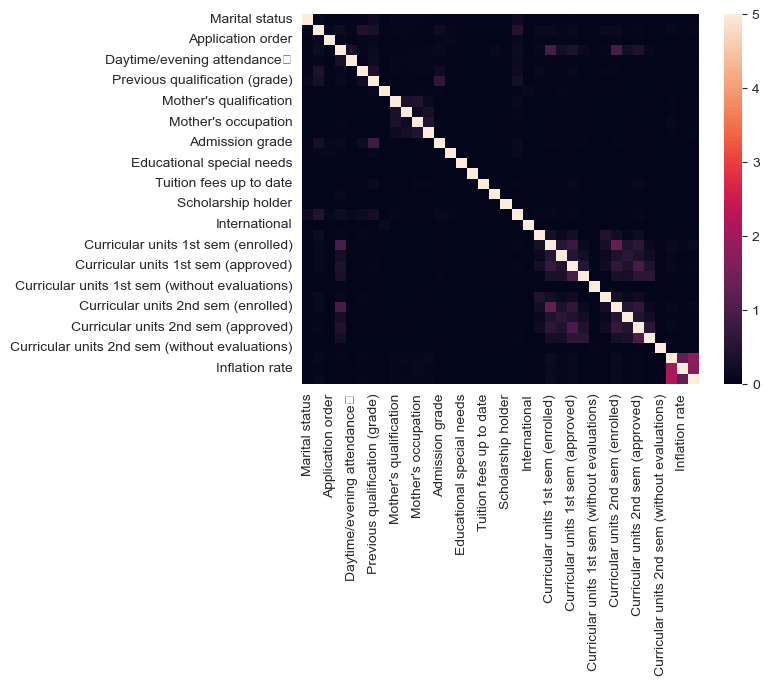

In [7]:
import seaborn as sns
df = Mutual_Info_df.replace([np.inf, -np.inf], 5)
sns.heatmap(df)

In [14]:
# High mutual info between 
# Curricular units 2nd sem (enrolled) and Curricular units 1st sem (enrolled)
# Inflation rate and Unemployment rate
# GDP and Unemployment rate and Inflation rate
# Removing redundant variables, leaving only Curricular units 1st sem (enrolled) and GDP

X_filtered = X.drop(columns=['Curricular units 2nd sem (enrolled)', 'Inflation rate', 'Unemployment rate'])

## Feature Selection via mutual information
# Step 1: Perform feature selection using mutual information
# Select top 2 features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected = selector.fit_transform(X_filtered, Y)

In [15]:
from sklearn.model_selection import train_test_split

#20% for testing  80% for training
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

# Naive Bayes (Gaussian)
model = GaussianNB()

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)

print("The performance of the Naive Bayes on uncleaned dataset is: %.2f"%(acc))

The performance of the Naive Bayes on uncleaned dataset is: 0.69


In [23]:
for i in range (2,10):
    model = GaussianNB()
    selector = SelectKBest(score_func=mutual_info_classif, k=i)
    X_selected = selector.fit_transform(X_filtered, Y)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    
    print(f"The performance of the Gaussian Naive Bayes on with k={i} is: %.2f"%(acc))
    

The performance of the Naive Bayes on with k=2 is: 0.70
The performance of the Naive Bayes on with k=3 is: 0.69
The performance of the Naive Bayes on with k=4 is: 0.66
The performance of the Naive Bayes on with k=5 is: 0.68
The performance of the Naive Bayes on with k=6 is: 0.69
The performance of the Naive Bayes on with k=7 is: 0.69
The performance of the Naive Bayes on with k=8 is: 0.69
The performance of the Naive Bayes on with k=9 is: 0.69


In [24]:
for i in range(2, 10):
    model = MultinomialNB()
    selector = SelectKBest(score_func=mutual_info_classif, k=i)
    X_selected = selector.fit_transform(X_filtered, Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)

    print(f"The performance of the Gaussian Naive Bayes on with k={i} is: %.2f" % (acc))
    

The performance of the Gaussian Naive Bayes on with k=2 is: 0.49
The performance of the Gaussian Naive Bayes on with k=3 is: 0.53
The performance of the Gaussian Naive Bayes on with k=4 is: 0.58
The performance of the Gaussian Naive Bayes on with k=5 is: 0.64
The performance of the Gaussian Naive Bayes on with k=6 is: 0.63
The performance of the Gaussian Naive Bayes on with k=7 is: 0.64
The performance of the Gaussian Naive Bayes on with k=8 is: 0.68
The performance of the Gaussian Naive Bayes on with k=9 is: 0.68


In [25]:
for i in range(2, 10):
    model = ComplementNB()
    selector = SelectKBest(score_func=mutual_info_classif, k=i)
    X_selected = selector.fit_transform(X_filtered, Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)

    print(f"The performance of the Gaussian Naive Bayes on with k={i} is: %.2f" % (acc))
    

The performance of the Gaussian Naive Bayes on with k=2 is: 0.64
The performance of the Gaussian Naive Bayes on with k=3 is: 0.59
The performance of the Gaussian Naive Bayes on with k=4 is: 0.66
The performance of the Gaussian Naive Bayes on with k=5 is: 0.69
The performance of the Gaussian Naive Bayes on with k=6 is: 0.68
The performance of the Gaussian Naive Bayes on with k=7 is: 0.69
The performance of the Gaussian Naive Bayes on with k=8 is: 0.69
The performance of the Gaussian Naive Bayes on with k=9 is: 0.70


In [26]:
for i in range(2, 10):
    model = BernoulliNB()
    selector = SelectKBest(score_func=mutual_info_classif, k=i)
    X_selected = selector.fit_transform(X_filtered, Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)

    print(f"The performance of the Gaussian Naive Bayes on with k={i} is: %.2f" % (acc))
    

The performance of the Gaussian Naive Bayes on with k=2 is: 0.63
The performance of the Gaussian Naive Bayes on with k=3 is: 0.63
The performance of the Gaussian Naive Bayes on with k=4 is: 0.63
The performance of the Gaussian Naive Bayes on with k=5 is: 0.63
The performance of the Gaussian Naive Bayes on with k=6 is: 0.63
The performance of the Gaussian Naive Bayes on with k=7 is: 0.63
The performance of the Gaussian Naive Bayes on with k=8 is: 0.63
The performance of the Gaussian Naive Bayes on with k=9 is: 0.63


In [27]:
for i in range(2, 10):
    model = CategoricalNB()
    selector = SelectKBest(score_func=mutual_info_classif, k=i)
    X_selected = selector.fit_transform(X_filtered, Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)

    print(f"The performance of the Gaussian Naive Bayes on with k={i} is: %.2f" % (acc))
    

The performance of the Gaussian Naive Bayes on with k=2 is: 0.69
The performance of the Gaussian Naive Bayes on with k=3 is: 0.69
The performance of the Gaussian Naive Bayes on with k=4 is: 0.68
The performance of the Gaussian Naive Bayes on with k=5 is: 0.67
The performance of the Gaussian Naive Bayes on with k=6 is: 0.68
The performance of the Gaussian Naive Bayes on with k=7 is: 0.68
The performance of the Gaussian Naive Bayes on with k=8 is: 0.70
The performance of the Gaussian Naive Bayes on with k=9 is: 0.70
